In [1]:
import os
res_list = []
def read_all_results(main_directory):
    results = {}

    # 获取方法文件夹列表
    method_folders = os.listdir(os.path.join(main_directory, 'outputs'))

    # 遍历每个方法文件夹
    for method_folder in method_folders:
        method_path = os.path.join(main_directory, 'outputs', method_folder)

        # 检查是否存在regression文件夹
        regression_path = os.path.join(method_path, 'regression')
        if not os.path.exists(regression_path):
            continue

        # 读取all_results.txt文件的最后三行
        results_file_path = os.path.join(regression_path, 'all_results.txt')
        if os.path.exists(results_file_path):
            with open(results_file_path, 'r') as file:
                # 使用readlines()读取所有行，并取最后三行
                lines = file.readlines()[-3:]
                results[method_folder] = ''.join(lines)
        else:
            results[method_folder] = "No all_results.txt file found."

    return results

# 示例用法
main_directory = 'ckpt/R_P_CDS'
results = read_all_results(main_directory)
results

{'autokeras': 'all r2: [0.10880779 0.27786751]\nall pearson: [0.32986026 0.5271314 ]\nall spearman: [0.42371688 0.54248258]\n',
 'deepswarm': 'all r2: [0.3689628  0.65764814]\nall pearson: [0.60742308 0.81095508]\nall spearman: [0.61331632 0.81919606]\n',
 'tpot': 'all r2: [0.46478862 0.5033203 ]\nall pearson: [0.68175408 0.7094507 ]\nall spearman: [0.67771765 0.72424026]\n'}

In [2]:
import pandas as pd
import re

def parse_and_calculate_mean(data_str):
    df_dict = {'Method': [], 'Metric': [], 'Value': []}

    for method, metrics_str in data_str.items():
        for metric_line in metrics_str.split('\n'):
            if metric_line:
                metric_match = re.match(r'all (\w+): \[(.*?)\]', metric_line)
                metric_name, metric_values_str = metric_match.groups()
                metric_values = [float(val) for val in metric_values_str.split()]

                df_dict['Method'].append(method)
                df_dict['Metric'].append(metric_name)
                df_dict['Value'].append(metric_values)

    df = pd.DataFrame(df_dict)
    df['Mean'] = df['Value'].apply(lambda x: sum(x) / len(x))
    result_df = df.pivot(index='Method', columns='Metric', values='Mean').reset_index()
    # result_df.columns = ['Pearson','R2','']
    # ['R2', 'Pearson', 'Spearman']
    return result_df


result_df = parse_and_calculate_mean(results)

result_df


Metric,Method,pearson,r2,spearman
0,autokeras,0.428496,0.193338,0.483100
1,deepswarm,0.709189,0.513305,0.716256
2,tpot,0.695602,0.484054,0.700979


In [3]:
# 示例用法
res_list = []
name_list = ['R_P_CDS','P_CDS','R_CDS','R_P']
for i in range(len(name_list)):
    main_directory = f'output/{name_list[i]}'
    results = read_all_results(main_directory)
    result_df = parse_and_calculate_mean(results)
    res_list.append(result_df[result_df['Method']=='deepswarm'][['r2','pearson','spearman']].values[0].tolist())

In [4]:
res_list

[[0.51330547, 0.70918908, 0.71625619],
 [0.491949905, 0.6994911699999999, 0.6994921949999999],
 [0.19817780000000002, 0.44496234, 0.41635999],
 [0.446616605, 0.66669741, 0.674838745]]

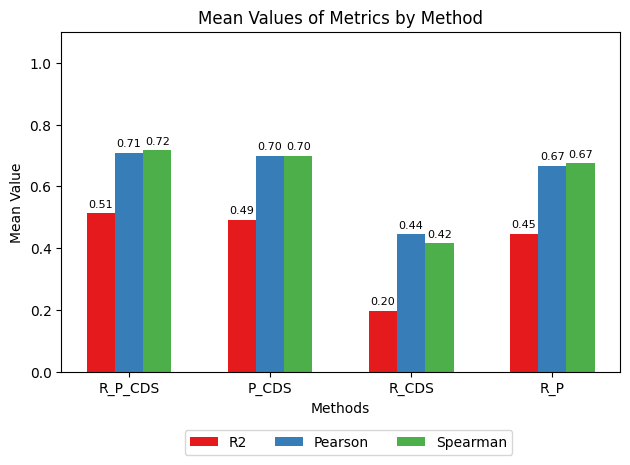

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Method names
methods = ['R_P_CDS', 'P_CDS', 'R_CDS', 'R_P']

# Metrics
metrics = ['R2', 'Pearson', 'Spearman']

# Mean values for each metric and method
mean_values = {
    'R_P_CDS': res_list[0],
    'P_CDS': res_list[1],
    'R_CDS': res_list[2],
    'R_P': res_list[3]
}

# Set up positions for each group of bars
bar_width = 0.2
index = np.arange(len(methods))

# Create subplots
fig, ax = plt.subplots()

# Plot each metric for each method
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

for i, metric in enumerate(metrics):
    values = [mean_values[method][i] for method in methods]
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric, color=colors[i])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Configure plot
ax.set_xlabel('Methods')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values of Metrics by Method')
ax.set_xticks(index + bar_width * 1)
ax.set_xticklabels(methods)
ax.legend(bbox_to_anchor=(0.82, -0.15),ncol=4, fontsize=10)
ax.set_ylim(0,1.1)
# Show plot
plt.tight_layout()
plt.savefig("output/compare.png")
plt.show()


In [6]:
result_df

Metric,Method,pearson,r2,spearman
0,autokeras,0.403786,0.163159,0.414885
1,deepswarm,0.666697,0.446617,0.674839
2,tpot,0.681847,0.464921,0.687604


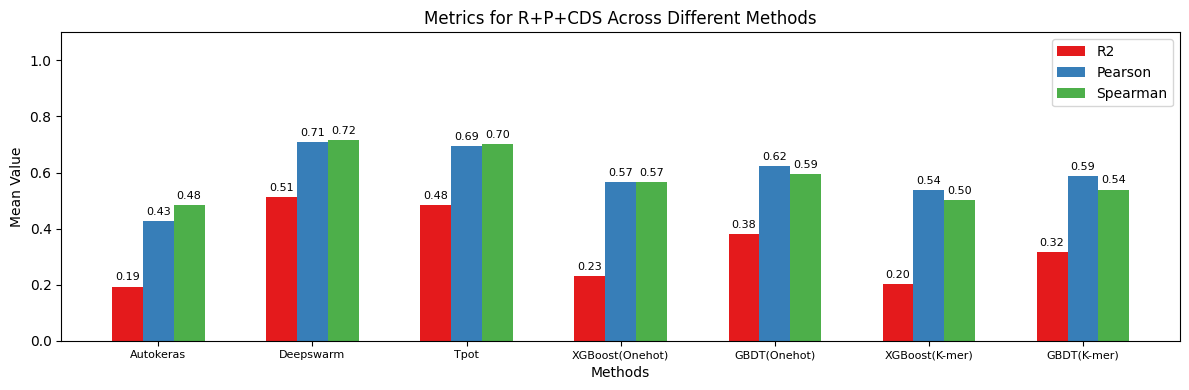

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Method names
methods = ['Autokeras','Deepswarm','Tpot', 'XGBoost(Onehot)', 'GBDT(Onehot)', 'XGBoost(K-mer)', 'GBDT(K-mer)']

# Metrics
metrics = ['R2', 'Pearson', 'Spearman']

# Mean values for each metric and method
mean_values = {
    'Autokeras': [0.193, 0.428, 0.483],
    'Deepswarm': [0.513, 0.709, 0.716],
    'Tpot': [0.484, 0.695, 0.700],
    'XGBoost(Onehot)': [ 0.231, 0.567, 0.567],
    'GBDT(Onehot)': [0.380,0.622,0.594],
    'XGBoost(K-mer)': [0.203,0.537,0.501],
    'GBDT(K-mer)': [0.315,0.586,0.539],
}

# Set up positions for each group of bars
bar_width = 0.2
index = np.arange(len(methods))

# Create subplots with adjusted figure size
fig, ax = plt.subplots(figsize=(12, 4))

# Plot each metric for each method
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

for i, metric in enumerate(metrics):
    values = [mean_values[method][i] for method in methods]
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric, color=colors[i])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Configure plot
ax.set_xlabel('Methods')
ax.set_ylabel('Mean Value')
ax.set_title('Metrics for R+P+CDS Across Different Methods')
ax.set_xticks(index + bar_width * 1)
ax.set_xticklabels(methods, fontsize=8)  # Adjust font size for x-axis labels
# ax.legend(bbox_to_anchor=(0.72, -0.15), ncol=4, fontsize=8)
ax.legend(fontsize=10)

ax.set_ylim(0, 1.1)

# Show plot
plt.tight_layout()
plt.savefig("output/ml_compare.png")

plt.show()


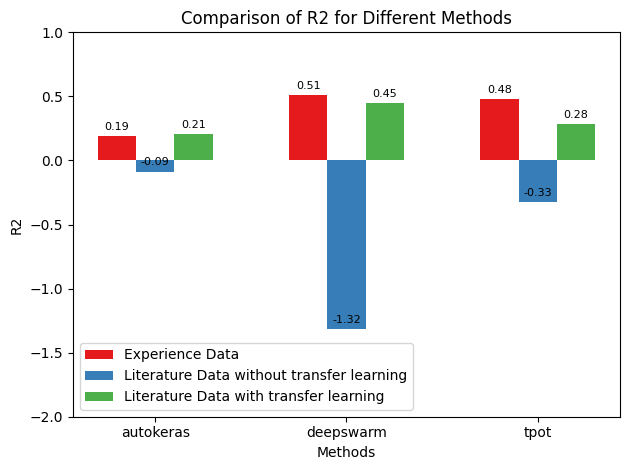

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Method names
methods = ['autokeras', 'deepswarm', 'tpot']

# Metrics
metrics = ['Experience Data', 'Literature Data without transfer learning', 'Literature Data with transfer learning']

# Mean values for each metric and method
mean_values = {
    'autokeras': [0.19, -0.087, 0.208],
    'deepswarm': [ 0.51, -1.319, 0.451],
    'tpot': [0.48, -0.326, 0.285],
}

# Set up positions for each group of bars
bar_width = 0.2
index = np.arange(len(methods))

# Create subplots
fig, ax = plt.subplots()

# Plot each metric for each method
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

for i, metric in enumerate(metrics):
    values = [mean_values[method][i] for method in methods]
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric, color=colors[i])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Configure plot
ax.set_xlabel('Methods')
ax.set_ylabel('R2')
ax.set_title('Comparison of R2 for Different Methods')
ax.set_xticks(index + bar_width * 1)
ax.set_xticklabels(methods)
ax.legend()
ax.set_ylim(-2,1)
# Show plot
plt.tight_layout()
plt.savefig("output/auto_compare.png")
plt.show()
